<a href="https://colab.research.google.com/github/ehom/colab_notebooks/blob/main/intro-to-tensorflow/w2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning

https://www.coursera.org/learn/introduction-tensorflow

## Week 2: Introduction to Computer Vision

In [6]:
import tensorflow as tf

print("{} {}".format(tf.__name__, tf.__version__))

tensorflow 2.7.0


In [7]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

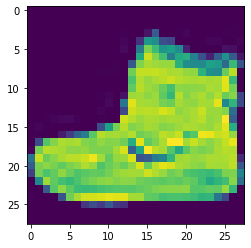

In [8]:
import numpy as np
np.set_printoptions(linewidth=200)

import matplotlib.pyplot as plt
plt.imshow(training_images[0])

print(training_labels[0])
print(training_images[0])

In [9]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(128, activation=tf.nn.relu), 
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [11]:
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5005 - accuracy: 0.8229
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3722 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3368 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3125 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2947 - accuracy: 0.8910


In [12]:
loss, accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3528 - accuracy: 0.8729


In [13]:
print("Loss: {}".format(loss))
print("Accuracy: {}".format(accuracy))

Loss: 0.35283249616622925
Accuracy: 0.8729000091552734


### Exploration Exercises

#### Lab 1:

In [14]:
# Creates a set of classifications for each of the test images, and then 
# print the first entry in the classifications. 

classifications = model.predict(test_images)

In [15]:
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4, width=1)

# The output, after you run it, is a list of numbers. 
# Why do you think this is, and what do those numbers represent?

pp.pprint(classifications[0].tolist())
print(test_labels[0])

[   1.996350874833297e-06,
    4.2245838471899333e-07,
    2.73506839221227e-06,
    3.682803040305771e-08,
    1.281870822822384e-07,
    0.01805534027516842,
    1.6246547602349892e-05,
    0.019387606531381607,
    6.50247829980799e-06,
    0.9625289440155029]
9


#### Lab 2:

In [16]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

class Dataset:
  images = None
  labels = None

training_data = Dataset()
test_data = Dataset()

(training_data.images, training_data.labels), (test_data.images, test_data.labels) = mnist.load_data()


In [54]:
training_data.images = training_data.images / 255.0
test_data.images = test_data.images / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation = tf.nn.relu), # Try experimenting with this layer
  tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(
    training_data.images,
    training_data.labels, 
    epochs = 5
)

test_loss, test_accuracy = model.evaluate(test_data.images, test_data.labels)

print("\ntest_loss:", test_loss)
print("test_accuracy:", test_accuracy)


Epoch 1/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.8072 - accuracy: 0.7291
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5148 - accuracy: 0.8168
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4617 - accuracy: 0.8366
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4327 - accuracy: 0.8472
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.4315 - accuracy: 0.8437

test_loss: 0.4314652979373932
test_accuracy: 0.8436999917030334


In [40]:
from pprint import PrettyPrinter
pp = PrettyPrinter(indent = 4)

classifications = model.predict(test_data.images)

pp.pprint(classifications[0].tolist())

print(test_data.labels[0])

[   0.08631572872400284,
    0.036267705261707306,
    0.12970200181007385,
    0.1327819973230362,
    0.04688790440559387,
    0.1536988765001297,
    0.0872155949473381,
    0.06790070980787277,
    0.12967048585414886,
    0.12955902516841888]
9


Now let's run it without the first layer

In [41]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
  # tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation = tf.nn.relu),
  tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


ValueError: ignored

In [42]:
# Use Callback to help make the prediction process more efficient

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') > 0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True


class Dataset:
  images = None
  labels = None


def load_dataset():
  normalize = lambda images: images / 255.0

  mnist = tf.keras.datasets.fashion_mnist
  training_data, test_data = Dataset(), Dataset()

  (
    (training_data.images, training_data.labels), 
    (test_data.images, test_data.labels)
  ) = mnist.load_data()

  training_data.images = normalize(training_data.images)
  test_data.images = normalize(test_data.images)

  return training_data, test_data


In [43]:
training_data, test_data = load_dataset()

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(512, activation = tf.nn.relu),
  tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(
  optimizer = tf.optimizers.Adam(),
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy']
)

model.summary()

history = model.fit(
  training_data.images,
  training_data.labels,
  epochs = 10,
  callbacks=[callbacks]
)

print("history:", history.epoch, history.history['accuracy'][-1])

test_loss, test_accuracy = model.evaluate(test_data.images, test_data.labels)

print('-' * 20)
print('Evaluate the loss and accuracy from the test set...')

show = lambda s, value: print("{}: {}".format(s, value))

show("loss", test_loss)
show("accuracy", test_accuracy)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4726 - accuracy: 0.8330
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3595 - accuracy: 0.8685
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3231 - accuracy: 0.8813
Epo

### Assignment: Handwriting Recognition

Build a neural network that recognizes handwriting digits

In [26]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

print("{}: {}".format(tf.__name__, tf.__version__))

tensorflow: 2.7.0


In [44]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [32]:
print("shape of image:", x_train[0].shape)
print("first label:", y_train[0])

print("all labels", y_train)
print("Number of Labels:", len(y_train))

print("shape of each image in the test dataset", x_test[0].shape)
print("first label in test dataset:", y_test[0])

shape of image: (28, 28)
first label: 5
all labels [5 0 4 ... 5 6 8]
Number of Labels: 60000
shape of each image in the test dataset (28, 28)
first label in test dataset: 7


Taking a peek at the first character image of the training set

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0 

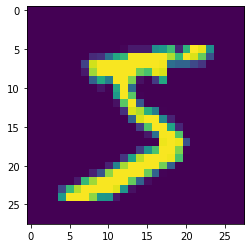

In [33]:
import numpy as np
np.set_printoptions(linewidth=200)

import matplotlib.pyplot as plt
plt.imshow(x_train[0])

print(y_train[0])
print(x_train[0])

Taking a quick peek at the test dataset by plotting the first character image

You should see the character image for:  7
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254

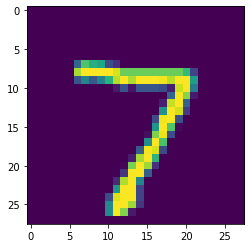

In [34]:
import numpy as np
np.set_printoptions(linewidth = 200)

import matplotlib.pyplot as plt
plt.imshow(x_test[0])

print("You should see the character image for: ", y_test[0])
print(x_test[0])

In [45]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(512, activation=tf.nn.relu),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(
  optimizer = tf.optimizers.Adam(),
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy']
)


In [53]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') is not None and logs.get('accuracy') > 0.99):
      print("\nReached 99% accuracy so canceling training!")
      self.model.stop_training = True

callbacks = myCallback()

model.fit(x_train, y_train, epochs = 5, callbacks = callbacks)

prediction = model.predict(
  np.array([x_test[0]])
)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 2.6890 - accuracy: 0.9046
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3466 - accuracy: 0.9340
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3203 - accuracy: 0.9371
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2757 - accuracy: 0.9453
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2549 - accuracy: 0.9493


In [52]:
from pprint import PrettyPrinter
pp = PrettyPrinter(indent = 4)

print(x_test.shape)
print(len(prediction))
pp.pprint(prediction[0].tolist())


(10000, 28, 28)
1
[   0.0,
    7.758695005571123e-20,
    4.914175132675866e-17,
    4.1223890620556425e-12,
    4.587067531378991e-19,
    0.0,
    0.0,
    1.0,
    0.0,
    1.9726428547619233e-16]


### Notes

1. Fashion MNIST
1. 28x28 Greyscale
1. 70,000 images in the Fashion MNIST dataset
1. Why are there 10 output neurons? Is it because there are 10 different labels?
1. What does Relu do?
1. The data is split into training and test sets so that we can test a network with previously unseen data.
1. The method that gets called when an epoch finishes is `on_epoch_end`.
1. The parameter to set in your fit function to tell it to use callbacks is `callbacks=`.